## Exploratory analysis on the - Admission Data 
taken from kaggle - https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/code?datasetId=14872&language=Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_adm = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [3]:
df_adm.shape

(500, 9)

In [4]:
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df_adm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

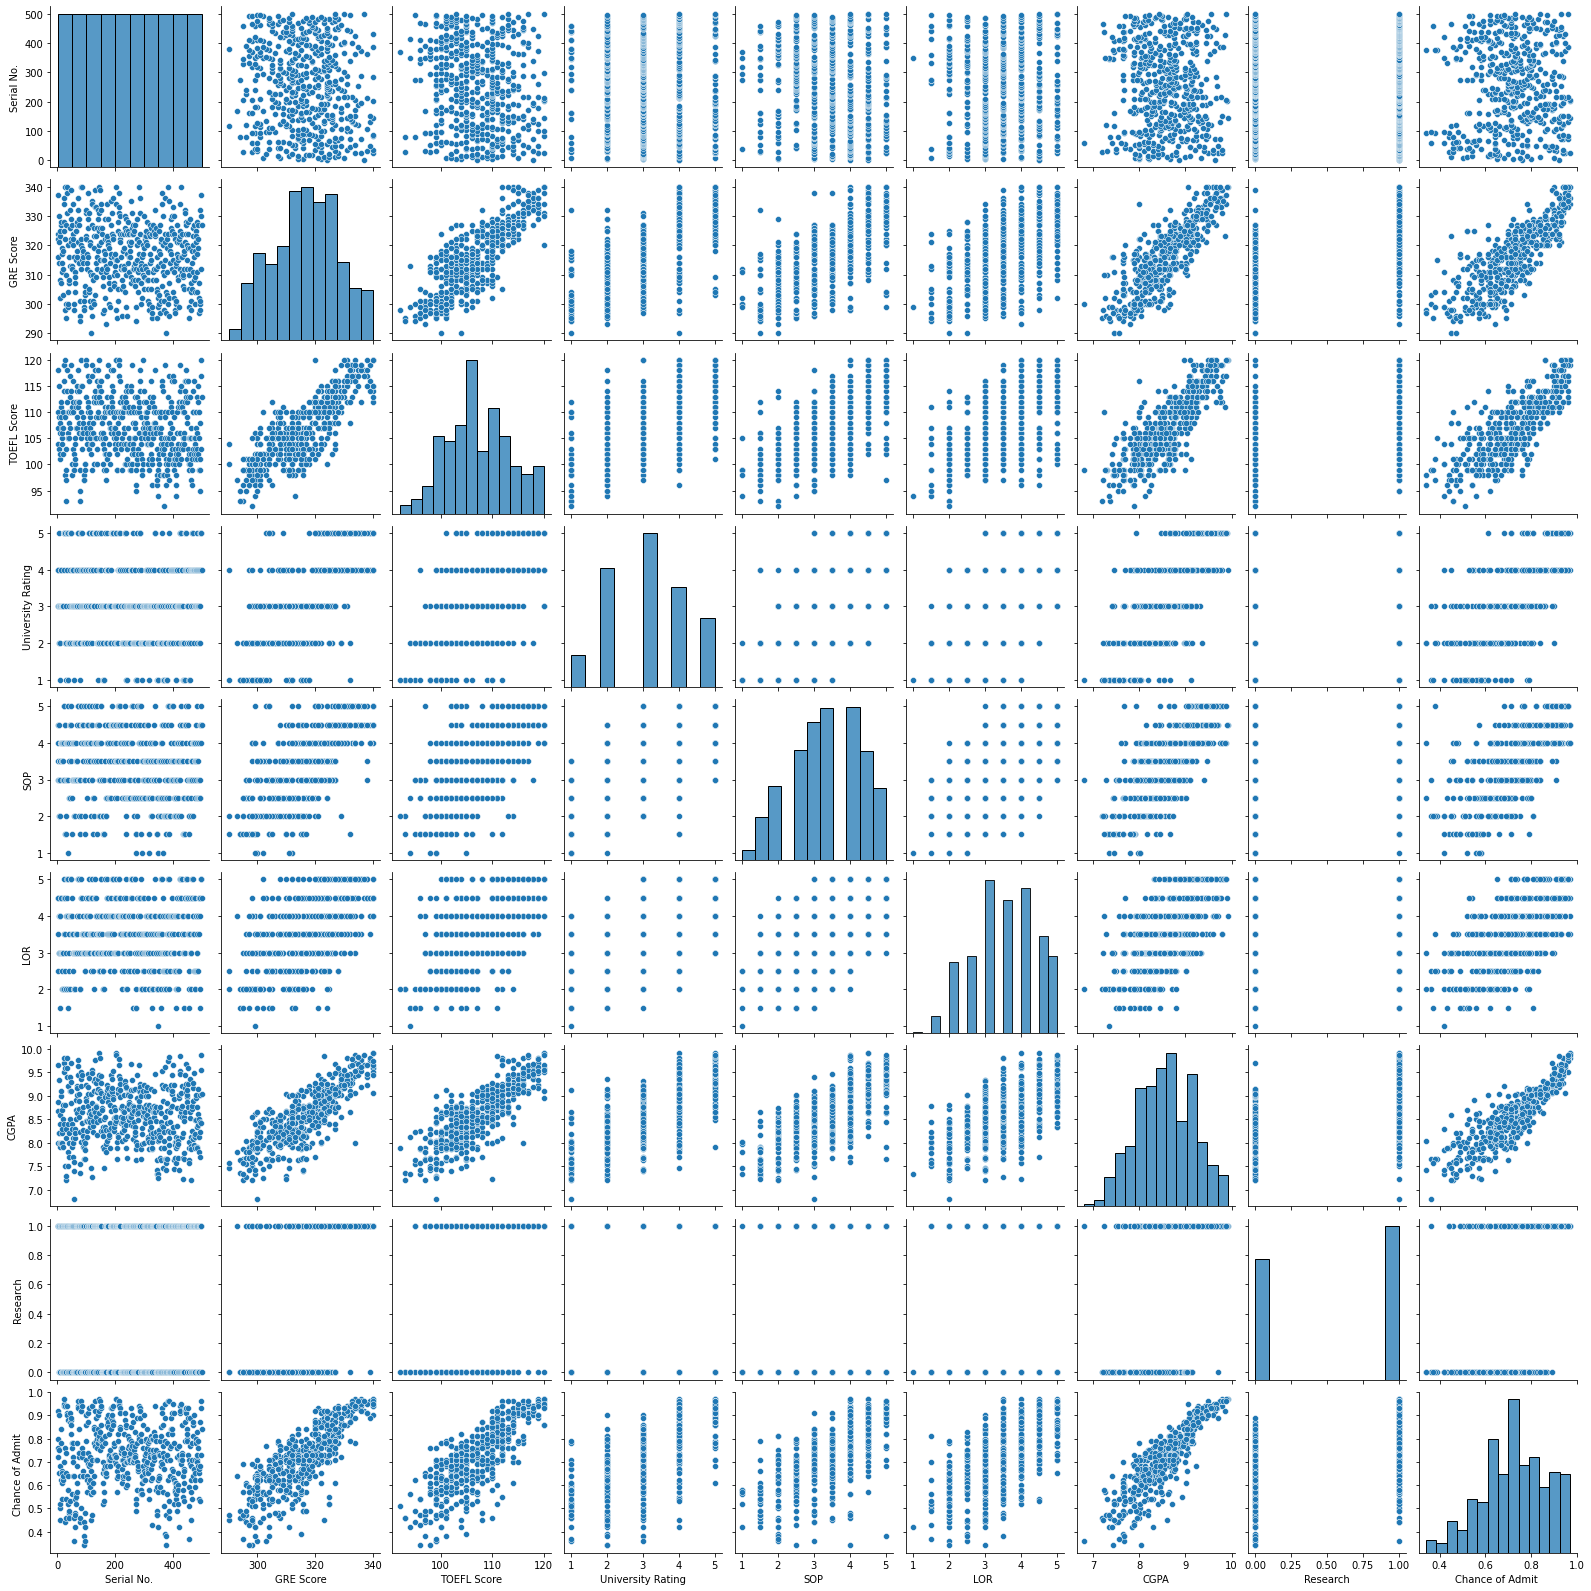

In [7]:
# get some pair plots
sns.pairplot(df_adm)

In [8]:
corr = df_adm.corr()

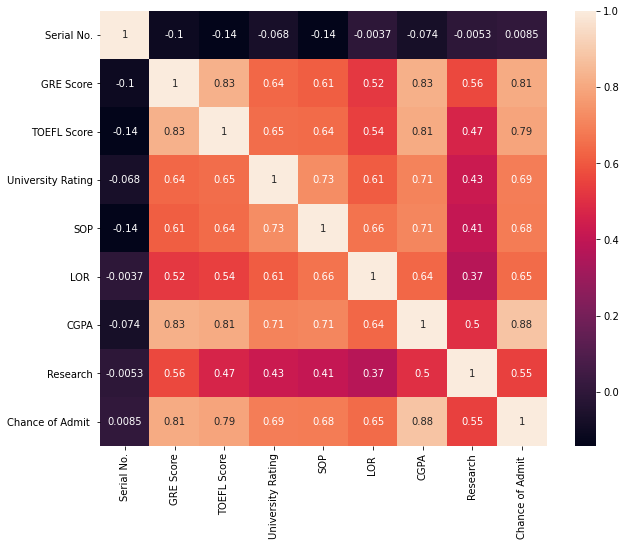

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

#### Observation: GRE Score and CGPA has more than 0.8 correlation with Chance of admit followed by TOEFL score

### Try: just use GRE score, CGPA and TOEFL for the prediction of chance of admit

In [10]:
X = df_adm[["GRE Score","CGPA","TOEFL Score"]]

In [11]:
y = df_adm["Chance of Admit "]

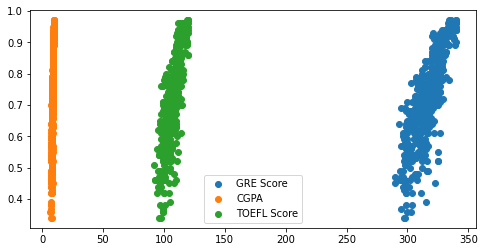

In [12]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

for name in X.columns:
    ax.scatter(X[name], y, label=name)
ax.legend()

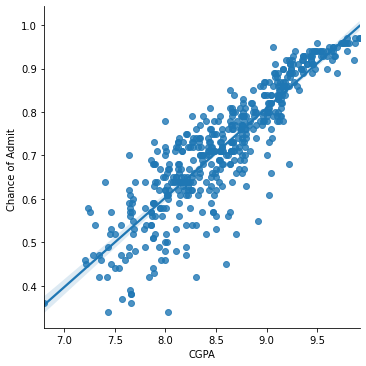

In [13]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=df_adm, fit_reg= True) 

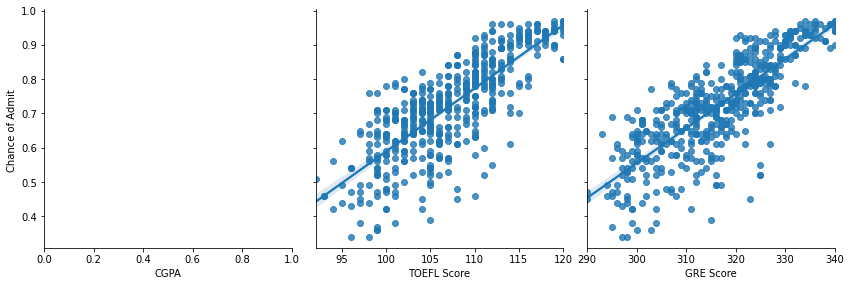

In [14]:
sns.pairplot(df_adm, x_vars=["CGPA","TOEFL Score","GRE Score"], y_vars=["Chance of Admit "], kind = "reg", height=4)

In [15]:
# Split the data in train and test

In [37]:
seed = 54
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,train_size=0.7, random_state=seed)

In [38]:
# Apply Regression

In [39]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8051655854394775

In [40]:
reg.coef_, reg.intercept_

(array([0.00186215, 0.15526771, 0.00265258]), -1.4827869156061513)

In [41]:
# Make predictions using the testing set
y_predict = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)

# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_predict))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

Coefficients: 
 [0.00186215 0.15526771 0.00265258]
Mean squared error: 0.00370
Coefficient of determination: 0.82


In [43]:
reg.feature_names_in_

array(['GRE Score', 'CGPA', 'TOEFL Score'], dtype=object)

In [42]:
# save the model
from joblib import dump, load
dump(reg, 'regression_model.joblib') 

['regression_model.joblib']

In [67]:
test1 = np.array([315,9.0, 110]).reshape(1,-1)
reg.predict(test1)

D:\Softwares\PYTHON\Lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.79298318])

In [22]:
# # load model
# reg_load = load('regression_model.joblib') 